# Hypothesis Testing with Insurance Data
- Daniel Barella
- 2/12/23


For this assignment, we will be working with the [US Health Insurance Dataset](https://docs.google.com/spreadsheets/d/e/2PACX-1vQBN8DPW2rdiRrY34eEM53HAzakNGSRrw4ogI-j8HyCUrbqTB_z4CeIn2IvjLF-w_6sOe5pIlypJGAA/pub?output=csv) from Kaggle.

We have been asked to use our hypothesis testing skills to answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?

For each question, make sure to:

1. State your Null Hypothesis and Alternative Hypothesis
2. Select the correct test according to the data type and number of samples
3. Test the assumptions of your selected test.
4. Execute the selected test, or the alternative test (if you do not meet the assumptions)
5. Interpret your p-value and reject or fail to reject your null hypothesis 
6. Show a supporting visualization that helps display the result

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQBN8DPW2rdiRrY34eEM53HAzakNGSRrw4ogI-j8HyCUrbqTB_z4CeIn2IvjLF-w_6sOe5pIlypJGAA/pub?output=csv'
df = pd.read_csv(url)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## - Q1. Do smokers have higher insurance charges than non-smokers?


### 1. State your Null Hypothesis and Alternative Hypothesis


#### Null Hypothesis: There is no difference between smoker and non smoker insurance charges.

#### Alternative Hypothesis: Smokers do have higher insurance charges.

#### Alpha: We will be using an alpha=.05

### 2. Select the correct test according to the data type and number of samples


- 2 Sample T-Test

### 3. Test the assumptions of your selected test.


#### Check for and remove outliers


In [4]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [5]:
smoker_df = df.loc[df['smoker']== "yes"].copy()
non_smoker_df = df.loc[df['smoker']== "no"].copy()

In [6]:
smoker_charges = smoker_df['charges']
non_smoker_charges = non_smoker_df['charges']

In [7]:
zscores= stats.zscore(smoker_charges)
outliers = abs(zscores)>3
np.sum(outliers)

0

In [8]:
zscores= stats.zscore(non_smoker_charges)
outliers = abs(zscores)>3
np.sum(outliers)

24

In [9]:
non_smoker_charges = non_smoker_charges[(np.abs(stats.zscore(non_smoker_charges)) < 3)]

#### Check for Normality


In [10]:
result_s = stats.normaltest(smoker_charges)
result_ns = stats.normaltest(non_smoker_charges)


In [11]:
print(result_s)

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)


In [12]:
print(result_ns)

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)


- Our p-values for both group are well below 0.05 which means our data is NOT normally distributed.  However, our our sample size is large enough to proceed without satisfying this test.  

#### Check for Equal Variance


In [13]:
result = stats.levene(smoker_charges, non_smoker_charges)
result

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

Looks like we don't have equal variances, but that won't stop us! We just need to be sure to include "equal_var = False" when we perform our t-test.

### 4. Execute the selected test, or the alternative test (if you do not meet the assumptions)


#### Perform and evaluate the t-test


In [14]:
result = stats.ttest_ind(smoker_charges, non_smoker_charges, equal_var = False)
result

Ttest_indResult(statistic=33.732305987092516, pvalue=2.5753226625873578e-104)

### 5. Interpret your p-value and reject or fail to reject your null hypothesis 


- Our p value is < alpha (0.05), so we reject the null hypothesis and accept that there is a significant difference between smoker insurance charges and non-smokers.

### 6. Show a supporting visualization that helps display the result

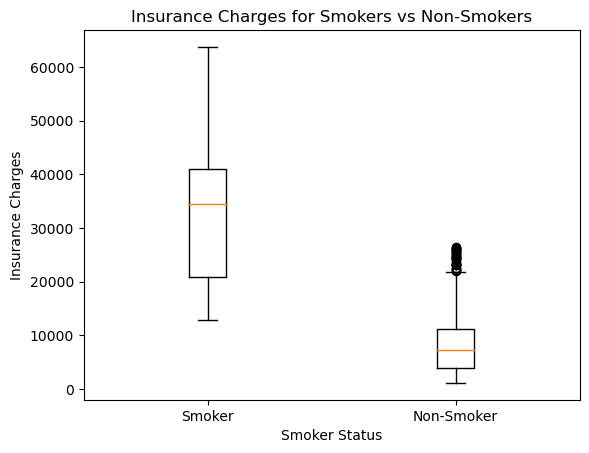

In [15]:
plt.boxplot([smoker_charges, non_smoker_charges], labels=['Smoker', 'Non-Smoker'])

plt.title("Insurance Charges for Smokers vs Non-Smokers")
plt.xlabel("Smoker Status")
plt.ylabel("Insurance Charges")

plt.show()

## - Q2. Are men more likely to smoke than women?


### 1. State your Null Hypothesis and Alternative Hypothesis

#### Null Hypothesis: There is no difference between the likelihood of men and women smoking.

#### Alternative Hypothesis: Men are more likely to smoke than women.

#### Alpha: We will be using an alpha=.05

### 2. Select the correct test according to the data type and number of samples


- Chi-Square Test

### 3. Test the assumptions of your selected test.


In [16]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


### 4. Execute the selected test, or the alternative test (if you do not meet the assumptions)


In [17]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results

In [18]:
# What was our p-value?
print(p)
p<.05

0.006548143503580696


True

### 5. Interpret your p-value and reject or fail to reject your null hypothesis 

The p-value is much less than 0.05,so we have a significant result.

### 6. Show a supporting visualization that helps display the result

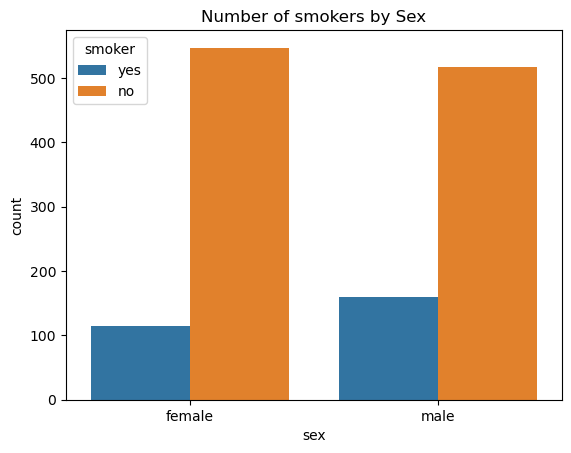

In [19]:
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Number of smokers by Sex");

## - Q3. Do different regions have different charges, on average?

### 1. State your Null Hypothesis and Alternative Hypothesis

#### Null Hypothesis: There is no significant difference in the mean charges among the regions.


#### Alternative Hypothesis: At least one region has a significantly different mean charge.

#### Alpha: We will be using an alpha=.05

In [20]:
# separate charges by region
southeast_charges = df[df['region'] == 'southeast']['charges']
southwest_charges = df[df['region'] == 'southwest']['charges']
northwest_charges = df[df['region'] == 'northwest']['charges']
northeast_charges = df[df['region'] == 'northeast']['charges']

### 2. Select the correct test according to the data type and number of samples

- Test: One-way ANOVA test

### 3. Test the assumptions of your selected test.


#### Check for and remove outliers


In [21]:
zscores= stats.zscore(southeast_charges)
outliers = abs(zscores)>3
np.sum(outliers)

2

In [22]:
zscores= stats.zscore(southwest_charges)
outliers = abs(zscores)>3
np.sum(outliers)

8

In [23]:
zscores= stats.zscore(northwest_charges)
outliers = abs(zscores)>3
np.sum(outliers)

7

In [24]:
zscores= stats.zscore(northeast_charges)
outliers = abs(zscores)>3
np.sum(outliers)

4

In [25]:
southeast_charges = southeast_charges[(np.abs(stats.zscore(southeast_charges)) < 3)]
southwest_charges = southwest_charges[(np.abs(stats.zscore(southwest_charges)) < 3)]
northwest_charges = northwest_charges[(np.abs(stats.zscore(northwest_charges)) < 3)]
northeast_charges = northeast_charges[(np.abs(stats.zscore(northeast_charges)) < 3)]


In [26]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

#### Check for Normality

In [29]:
result_southeast_charges = stats.normaltest(southeast_charges)
result_southeast_charges

NormaltestResult(statistic=58.544941922461014, pvalue=1.9369900501741734e-13)

In [30]:
result_southwest_charges = stats.normaltest(southwest_charges)
result_southwest_charges

NormaltestResult(statistic=97.22388571495878, pvalue=7.728611243124505e-22)

In [31]:
result_northwest_charges = stats.normaltest(northwest_charges)
result_northwest_charges

NormaltestResult(statistic=85.34104476016293, pvalue=2.9405433782452325e-19)

In [32]:
result_northeast_charges = stats.normaltest(northeast_charges)
result_northeast_charges

NormaltestResult(statistic=75.7495652843634, pvalue=3.5578767155624347e-17)

- Our p-values for all groups are well below 0.05 which means our data is NOT normally distributed.  However, our our sample size is large enough to proceed without satisfying this test.  

#### Check for Equal Variance


In [33]:
result = stats.levene(southeast_charges, southwest_charges, northwest_charges, northeast_charges)
result

LeveneResult(statistic=9.518349004554441, pvalue=3.2035503711783993e-06)

- Based on the result of the Levene's test, the p-value is smaller than 0.05, which suggests that the variances of charges among the four regions are not equal. Therefore, we cannot assume equal variances among the groups, which means we should use a non-parametric test to compare the charges among the regions. Kruskal-Wallis.

### 4. Execute the selected test, or the alternative test (if you do not meet the assumptions)

In [35]:
stat, p = stats.kruskal(southeast_charges, southwest_charges, northwest_charges, northeast_charges)

print("Kruskal-Wallis test statistic:", stat)
print("p-value:", p)
p<.05

Kruskal-Wallis test statistic: 6.914045702545643
p-value: 0.07468847911322242


False

### 5. Interpret your p-value and reject or fail to reject your null hypothesis 

- The p-value is 0.07468847911322242 which is greater than 0.05, so we "fail to reject" the null hypothesis. Therefore, we do not have enough evidence to conclude that there is a significant difference in charges between the four regions.

### 6. Show a supporting visualization that helps display the result

<AxesSubplot: xlabel='region', ylabel='charges'>

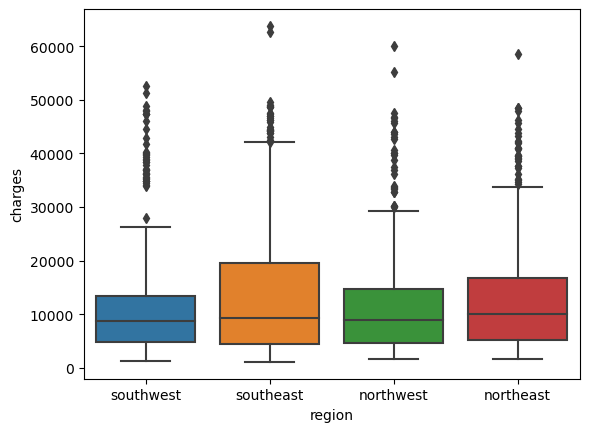

In [40]:
sns.boxplot(x='region', y='charges', data=df)
